In [134]:
import pandas as pd
import numpy as np
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix,roc_auc_score,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,roc_auc_score
from sklearn.decomposition import PCA
from import_data import *
from cleaning import *
import datetime
from model import *
from sklearn.linear_model import LogisticRegression

In [2]:
now = datetime.datetime.now()
this_year = now.year

In [3]:
salary = get_data('data/salary.p')
stats = get_data('data/stats.p')
free_agents = get_data('data/free_agents.p')

In [126]:
add_features(stats)
final_data = combine_data(salary,stats,free_agents)
final_data = cleaning(final_data)
dummies_data = pd.get_dummies(final_data,columns=['Type','Pos.'],drop_first=True)
final_data1,fa_this_year = seperate_this_year(dummies_data,this_year)
X = final_data1.drop(['Churn'],axis=1)
y = final_data1['Churn']
X_1, x_val, y_1, y_val = train_test_split(X,y,test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X_1,y_1)

/Users/MSteele/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [5]:
# nba_reduced,labels = scale_and_split(X_1,y_1)
# group0, y0 = split_groups(X_1,y_1,labels,0)
# X0_train, X0_test, y0_train, y0_test = train_test_split(group0,y0)
# group1, y1 = split_groups(X_1,y_1,labels,1)
# X1_train, X1_test, y1_train, y1_test = train_test_split(group1,y1)
# group2, y2 = split_groups(X_1,y_1,labels,2)
# X2_train, X2_test, y2_train, y2_test = train_test_split(group2,y2)

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [110]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X_1)
pca = PCA(n_components=3).fit(X1)
reduced = pca.transform(X1)

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [111]:
final = []
for c in range(1,15):
    pca = PCA(n_components=c).fit(X1)
    reduced = pca.transform(X1)
    scores = []
    for k in range(2,15):
        km = KMeans(n_clusters=k)
        km.fit(reduced)
        labels = km.predict(reduced)
        scores.append(silhouette_score(reduced,labels))
    #     fig, ax = plt.subplots(figsize=(10,7))

    #     for l in range(0, k):
    #         ax.scatter(reduced[labels == l, 0],
    #                     reduced[labels == l, 1],
    #                     label='Cluster %s' % l,
    #                     alpha=0.5,
    #                     )
    #     ax.set_title('Standardized training dataset after PCA')
    #     ax.set_xlabel('1st principal component')
    #     ax.set_ylabel('2nd principal component')
    #     ax.legend(loc='lower right',prop={'size': 14})
    #     images.append(fig)
    
    final.append(scores)

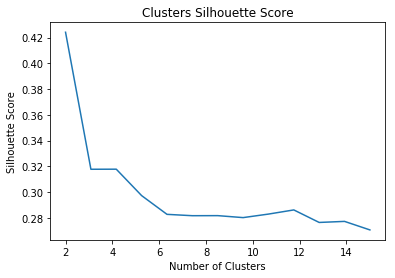

In [151]:
x = np.linspace(2,15,13)
plt.plot(x,final[2])
plt.title('Clusters Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.savefig('img/clusters_silhouette.png')

In [152]:
pca = PCA(n_components=2).fit(X1)
reduced = pca.transform(X1)
km = KMeans(n_clusters=2)
km.fit(reduced)
labels = km.predict(reduced)

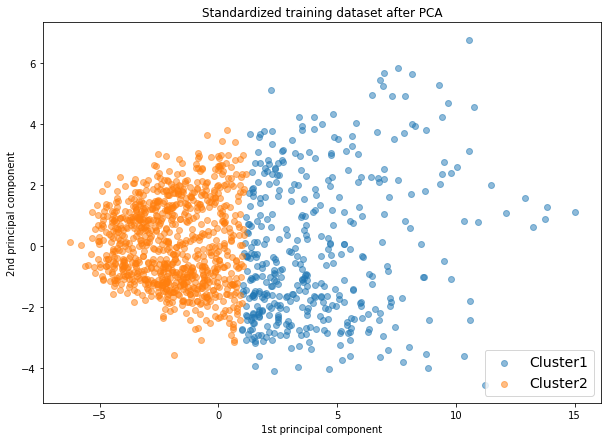

In [159]:
fig, ax = plt.subplots(figsize=(10,7))

for l,n in zip(range(0, 2),('Cluster1','Cluster2')):
    ax.scatter(reduced[labels == l, 0],
                reduced[labels == l, 1],
                label=n,
                alpha=0.5,
                )
ax.set_title('Standardized training dataset after PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(loc='lower right',prop={'size': 14})
plt.savefig('img/2clusters_pca.png')

In [153]:
X_1['Cluster'] = labels

/Users/MSteele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [156]:
X_1[X_1['Cluster']==0].describe()

,Team Cap,Year,Age,G,GS,MP,FG,FGA,3P,3PA,...,Salary,Salary %,Type_UFA,Pos._F,Pos._G,Pos._PF,Pos._PG,Pos._SF,Pos._SG,Cluster
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,...,4.130000e+02,413.000000,413.000000,413.0,413.000000,413.000000,413.000000,413.000000,413.000000,413.0
mean,6.347070e+06,2014.542373,28.000000,49.230024,17.815981,17.834625,2.567070,5.804600,0.571671,1.623487,...,4.090738e+06,0.059298,0.886199,0.0,0.004843,0.239709,0.205811,0.179177,0.215496,0.0
std,1.143286e+07,2.253642,4.260339,23.921349,23.695275,8.447430,1.775817,3.739581,0.625157,1.638465,...,4.982809e+06,0.070285,0.317955,0.0,0.069504,0.427424,0.404783,0.383965,0.411665,0.0
min,-3.118008e+07,2011.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.607900e+04,0.000465,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.489510e+05,2013.000000,25.000000,29.000000,1.000000,10.900000,1.300000,3.000000,0.000000,0.100000,...,9.926800e+05,0.014850,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,6.166117e+06,2015.000000,28.000000,54.000000,6.000000,17.300000,2.200000,4.900000,0.400000,1.200000,...,2.134593e+06,0.029103,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.295700e+07,2016.000000,31.000000,70.000000,24.000000,24.400000,3.500000,8.200000,1.000000,2.700000,...,5.421233e+06,0.073220,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,4.368104e+07,2018.000000,41.000000,83.000000,82.000000,37.600000,9.700000,19.200000,2.800000,7.300000,...,2.500000e+07,0.364631,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [157]:
X_1[X_1['Cluster']==1].describe()

,Team Cap,Year,Age,G,GS,MP,FG,FGA,3P,3PA,...,Salary,Salary %,Type_UFA,Pos._F,Pos._G,Pos._PF,Pos._PG,Pos._SF,Pos._SG,Cluster
count,8.660000e+02,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,...,8.660000e+02,866.000000,866.000000,866.0,866.000000,866.000000,866.000000,866.000000,866.000000,866.0
mean,6.956882e+06,2014.486143,27.926097,50.344111,18.213626,18.239261,2.598499,5.882448,0.622286,1.781062,...,3.751922e+06,0.055470,0.879908,0.0,0.005774,0.224018,0.210162,0.177829,0.225173,1.0
std,1.138368e+07,2.249299,4.249076,23.869429,24.704344,8.275939,1.739486,3.731589,0.651703,1.695383,...,4.504592e+06,0.066385,0.325257,0.0,0.075809,0.417175,0.407659,0.382590,0.417938,0.0
min,-3.118008e+07,2011.000000,19.000000,1.000000,0.000000,1.300000,0.000000,0.300000,0.000000,0.000000,...,2.402200e+04,0.000255,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7.881110e+05,2013.000000,24.000000,31.000000,0.000000,12.000000,1.300000,3.200000,0.000000,0.200000,...,9.451768e+05,0.014720,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,6.368266e+06,2014.000000,27.000000,56.000000,6.000000,17.400000,2.200000,5.100000,0.400000,1.400000,...,2.103204e+06,0.029220,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1.333206e+07,2016.000000,31.000000,72.000000,25.000000,24.400000,3.600000,8.000000,1.000000,2.900000,...,4.708125e+06,0.068486,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,4.368104e+07,2018.000000,40.000000,83.000000,82.000000,38.700000,10.500000,19.900000,4.100000,10.000000,...,3.328571e+07,0.387215,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [127]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
probs = rf.predict_proba(X_test)[:,1]
preds = get_preds(probs,y_test)
sum(preds==y_test)/len(y_test)

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.75

In [131]:
params = {'max_depth':[2,3,5,7,10] ,'n_estimators':[2,5,10,50,100,200,300],'min_samples_split':[2,4,6,8,10],'max_features':['sqrt',None]}
gs = GridSearchCV(rf,param_grid=params,scoring='f1').fit(X_train,y_train)
gs.best_params_

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 2,
 'max_features': None,
 'min_samples_split': 8,
 'n_estimators': 100}

In [132]:
rf_gs = RandomForestClassifier(max_depth=2,n_estimators=100,min_samples_split=8).fit(X_train,y_train)
probs_gs = rf_gs.predict_proba(X_test)[:,1]
preds_gs = get_preds(probs_gs,y_test)
sum(preds_gs==y_test)/len(y_test)

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.76875

In [133]:
f1_score(y_test,preds_gs)

0.8582375478927202

In [148]:
roc_auc_score(y_test,probs_gs)

0.7135990338164251

In [135]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:
lr_probs = lr.predict_proba(X_test)[:,1]
preds_lr = get_preds(lr_probs,y_test)
f1_score(y_test,preds_lr),sum(preds_lr==y_test)/len(y_test)

/Users/MSteele/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.8383458646616542, 0.73125)